In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.feature_selection import f_regression, SelectKBest, RFE 
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from math import sqrt 

from regprepare import get_auto_mpg, train_val_test

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = get_auto_mpg()
df.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
train, validate, test = train_val_test(df)
train.shape, validate.shape, test.shape

((235, 9), (78, 9), (79, 9))

In [4]:
mms = MinMaxScaler()

train[['displ', 'horsepower', 'weight', 'acc']] = mms.fit_transform(train[['displ', 'horsepower', 'weight', 'acc']])

train.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
212,16.5,8,0.727273,0.725275,0.784519,0.244048,76,1,"""cadillac seville"""
346,32.3,4,0.070130,0.104396,0.128154,0.583333,81,3,"""subaru"""
325,44.3,4,0.051948,0.000000,0.133825,0.815476,80,2,"""vw rabbit c (diesel)"""
90,12.0,8,0.932468,0.824176,0.946697,0.208333,73,1,"""mercury marquis brougham"""
246,32.8,4,0.020779,0.021978,0.105472,0.678571,78,3,"""mazda glc deluxe"""


## Select K Best

Uses statistial tests to compare each feature with the target variable to determine which features have the strongest relationship with the target.

Select K Best (stats test, k = num features to return)

Fit to data

get_support() to generate mask for columns names

In [5]:
X_train_scaled = train[['displ', 'horsepower', 'weight', 'acc']]
y_train = train['mpg']

In [6]:
f_selector = SelectKBest(f_regression, k = 2)

In [7]:
f_selector.fit(X_train_scaled, y_train)

SelectKBest(k=2, score_func=<function f_regression at 0x127a70ee0>)

In [8]:
f_select_mask = f_selector.get_support()
f_select_mask

array([ True, False,  True, False])

In [9]:
X_train_scaled.columns.to_list() 

['displ', 'horsepower', 'weight', 'acc']

In [10]:
X_train_scaled.columns[f_select_mask]

Index(['displ', 'weight'], dtype='object')

In [11]:
X_train_scaled.iloc[:,f_select_mask]

,displ,weight
212,0.727273,0.784519
346,0.070130,0.128154
325,0.051948,0.133825
90,0.932468,0.946697
246,0.020779,0.105472
...,...,...
72,0.607792,0.646158
107,0.420779,0.333428
272,0.210390,0.352141
352,0.072727,0.217465


In [12]:
f_selector.transform(X_train_scaled)

array([[0.72727273, 0.78451942],
       [0.07012987, 0.12815424],
       [0.05194805, 0.13382478],
       [0.93246753, 0.94669691],
       [0.02077922, 0.10547207],
       [0.12987013, 0.24836972],
       [0.6025974 , 0.45137511],
       [0.64415584, 0.74397505],
       [0.85714286, 0.79642756],
       [0.72727273, 0.58151403],
       [0.4025974 , 0.42755883],
       [0.03376623, 0.11057556],
       [0.18441558, 0.4471222 ],
       [0.46753247, 0.47207258],
       [0.46753247, 0.54068614],
       [0.72727273, 0.80606748],
       [0.13246753, 0.17607031],
       [0.72727273, 0.73603629],
       [0.05194805, 0.14516586],
       [0.22337662, 0.33853133],
       [0.72727273, 0.81910972],
       [0.16883117, 0.24865325],
       [0.16883117, 0.25857669],
       [0.4025974 , 0.50127587],
       [0.21038961, 0.30195634],
       [0.21038961, 0.3790757 ],
       [0.42077922, 0.36518287],
       [0.11948052, 0.17947264],
       [0.72727273, 0.7235611 ],
       [0.72727273, 0.67337681],
       [0.

## RFE 

Recursive feature elimination

Initialize a machine learning model

RFE(mode, n_feature_to_select = num features to return)

Fit to data

.support_to get mask

.ranking_to get ranking of features

In [13]:
train.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
212,16.5,8,0.727273,0.725275,0.784519,0.244048,76,1,"""cadillac seville"""
346,32.3,4,0.070130,0.104396,0.128154,0.583333,81,3,"""subaru"""
325,44.3,4,0.051948,0.000000,0.133825,0.815476,80,2,"""vw rabbit c (diesel)"""
90,12.0,8,0.932468,0.824176,0.946697,0.208333,73,1,"""mercury marquis brougham"""
246,32.8,4,0.020779,0.021978,0.105472,0.678571,78,3,"""mazda glc deluxe"""


In [14]:
X_train = train.drop(columns = ['mpg', 'model_year','name',])
X_train

,cylinders,displ,horsepower,weight,acc,origin
212,8,0.727273,0.725275,0.784519,0.244048,1
346,4,0.070130,0.104396,0.128154,0.583333,3
325,4,0.051948,0.000000,0.133825,0.815476,2
90,8,0.932468,0.824176,0.946697,0.208333,1
246,4,0.020779,0.021978,0.105472,0.678571,3
...,...,...,...,...,...,...
72,8,0.607792,0.560440,0.646158,0.267857,1
107,6,0.420779,0.285714,0.333428,0.416667,1
272,4,0.210390,0.203297,0.352141,0.571429,1
352,4,0.072727,0.093407,0.217465,0.755952,1


In [15]:
X_train = pd.get_dummies(X_train, columns = ['cylinders', 'origin'])

In [16]:
len(X_train.columns)

12

In [17]:
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 7)

In [18]:
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [19]:
ranks = rfe.ranking_

columns = X_train.columns.tolist()

In [20]:
feature_ranks = pd.DataFrame({'ranking': ranks,
                             'feature': columns})

In [21]:
feature_ranks.sort_values('ranking').reset_index().drop(columns = ('index'))

,ranking,feature
0,1,displ
1,1,horsepower
2,1,weight
3,1,cylinders_3
4,1,cylinders_4
5,1,cylinders_5
6,1,origin_3
7,2,cylinders_6
8,3,origin_2
9,4,origin_1


# Regression Modeling


In [22]:
from sklearn.metrics import mean_squared_error


validate[['displ', 'horsepower', 'weight', 'acc']] = mms.transform(validate[['displ', 'horsepower', 'weight', 'acc']])

X_validate = validate.drop(columns=['mpg', 'model_year', 'name'])

X_validate = pd.get_dummies(X_validate, columns=['cylinders', 'origin'])

y_validate = validate['mpg']

In [23]:
X_train.drop(columns= ['cylinders_5'], inplace= True)

In [24]:
X_train

,displ,horsepower,weight,acc,cylinders_3,cylinders_4,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
212,0.727273,0.725275,0.784519,0.244048,0,0,0,1,1,0,0
346,0.070130,0.104396,0.128154,0.583333,0,1,0,0,0,0,1
325,0.051948,0.000000,0.133825,0.815476,0,1,0,0,0,1,0
90,0.932468,0.824176,0.946697,0.208333,0,0,0,1,1,0,0
246,0.020779,0.021978,0.105472,0.678571,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
72,0.607792,0.560440,0.646158,0.267857,0,0,0,1,1,0,0
107,0.420779,0.285714,0.333428,0.416667,0,0,1,0,1,0,0
272,0.210390,0.203297,0.352141,0.571429,0,1,0,0,1,0,0
352,0.072727,0.093407,0.217465,0.755952,0,1,0,0,1,0,0


In [25]:
X_validate.head()

,displ,horsepower,weight,acc,cylinders_3,cylinders_4,cylinders_6,cylinders_8,origin_1,origin_2,origin_3
332,0.049351,0.076923,0.065778,0.434524,0,1,0,0,0,1,0
377,0.054545,0.109890,0.101219,0.571429,0,1,0,0,0,0,1
104,0.857143,0.653846,0.933655,0.267857,0,0,0,1,1,0,0
182,0.096104,0.208791,0.241282,0.446429,0,1,0,0,0,1,0
304,0.054545,0.115385,0.146583,0.398810,0,1,0,0,0,1,0


## Ordinary Least Squares

Linear Regression 

In [73]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [28]:
y_train.head()

212    16.5
346    32.3
325    44.3
90     12.0
246    32.8
Name: mpg, dtype: float64

In [29]:
lm_preds = lm.predict(X_train)

In [30]:
preds_df = pd.DataFrame({'actual': y_train,
                         'lm_preds': lm_preds})
preds_df.head()

,actual,lm_preds
212,16.5,12.008899
346,32.3,33.327807
325,44.3,31.963603
90,12.0,8.817639
246,32.8,34.716194


In [31]:
lm_rmse = sqrt(mean_squared_error(preds_df['lm_preds'], preds_df['actual']))
lm_rmse

3.744575765652876

## LASSO + LARS

Allows regularization.

Y should be normally distrubuted.

Alpha value increased penalty/regularization 

Regularization shrinks the coefficients for unimportant features

LassoLars

In [32]:
lasso = LassoLars(alpha = 0.1)

In [33]:
lasso.fit(X_train, y_train)

LassoLars(alpha=0.1)

In [34]:
lasso_preds = lasso.predict(X_train)

In [35]:
preds_df['lasso_preds'] = lasso_preds
preds_df.head()

,actual,lm_preds,lasso_preds
212,16.5,12.008899,14.600168
346,32.3,33.327807,29.700708
325,44.3,31.963603,30.434472
90,12.0,8.817639,11.924905
246,32.8,34.716194,30.600962


In [36]:
lasso_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['lasso_preds']))
lasso_rmse

4.269976148416746

## Polynomial regression 

Used when the relationhsip between features and target are not linear.

Transforms features for use in linear models

In [37]:
pf = PolynomialFeatures(degree = 2)

pf.fit(X_train, y_train)

PolynomialFeatures()

In [39]:
X_polynomial = pf.transform(X_train)

In [40]:
lm2 = LinearRegression()

lm2.fit(X_polynomial, y_train)

LinearRegression()

In [43]:
preds_df['poly_preds'] = lm2.predict(X_polynomial)

preds_df.head()

,actual,lm_preds,lasso_preds,poly_preds
212,16.5,12.008899,14.600168,17.1250
346,32.3,33.327807,29.700708,32.6250
325,44.3,31.963603,30.434472,36.1250
90,12.0,8.817639,11.924905,8.9375
246,32.8,34.716194,30.600962,40.6250


In [47]:
poly_rmse = sqrt(mean_squared_error(preds_df['actual'], preds_df['poly_preds']))

poly_rmse

5.837485306829201

In [52]:
lasso_two = LassoLars(alpha = .1)

lasso_two.fit(X_polynomial, y_train)

LassoLars(alpha=0.1)

In [54]:
preds_df['lasso_poly'] = lasso_two.predict(X_polynomial)

preds_df

,actual,lm_preds,lasso_preds,poly_preds,lasso_poly
212,16.5,12.008899,14.600168,17.1250,14.808871
346,32.3,33.327807,29.700708,32.6250,29.745845
325,44.3,31.963603,30.434472,36.1250,31.196280
90,12.0,8.817639,11.924905,8.9375,12.503780
246,32.8,34.716194,30.600962,40.6250,31.103780
...,...,...,...,...,...
72,15.0,16.096897,17.499722,14.6875,17.678605
107,18.0,21.982635,23.302914,18.1875,23.109635
272,23.8,26.749798,26.294981,20.0625,26.237041
352,29.9,29.810587,28.729514,16.1875,28.939745


In [56]:
lasso_poly_rmse = sqrt(mean_squared_error(preds_df.actual, preds_df.lasso_poly))

lasso_poly_rmse

4.2027306640299456

## Generalized Linear Model 

Allows for different distributions of target variable

power = 0; Normal Distribution 

power = 1; Poisson Distribution 

power = (1,2); Compound Distribution 

power = 2; Gamma Distribution 

power = 3; Inverse Gaussian Distribution 

(array([ 9., 48., 44., 33., 28., 29., 23., 14.,  2.,  5.]),
 array([ 9.  , 12.76, 16.52, 20.28, 24.04, 27.8 , 31.56, 35.32, 39.08,
        42.84, 46.6 ]),
 <BarContainer object of 10 artists>)

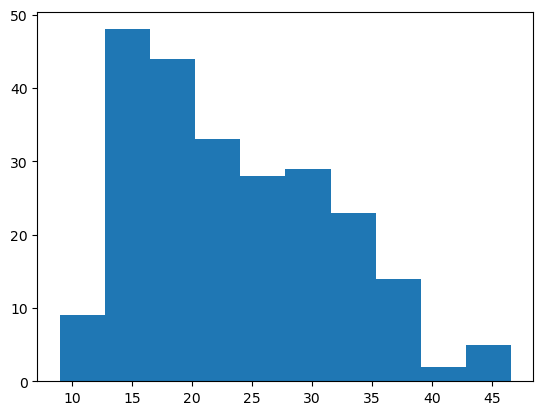

In [57]:
plt.hist(y_train)

In [58]:
tweedie = TweedieRegressor(power = 0)

tweedie.fit(X_train, y_train)

TweedieRegressor(power=0)

In [60]:
preds_df['tweedie'] = tweedie.predict(X_train)

preds_df

,actual,lm_preds,lasso_preds,poly_preds,lasso_poly,tweedie
212,16.5,12.008899,14.600168,17.1250,14.808871,19.790974
346,32.3,33.327807,29.700708,32.6250,29.745845,27.220785
325,44.3,31.963603,30.434472,36.1250,31.196280,26.852609
90,12.0,8.817639,11.924905,8.9375,12.503780,19.299961
246,32.8,34.716194,30.600962,40.6250,31.103780,27.407288
...,...,...,...,...,...,...
72,15.0,16.096897,17.499722,14.6875,17.678605,20.218466
107,18.0,21.982635,23.302914,18.1875,23.109635,22.103961
272,23.8,26.749798,26.294981,20.0625,26.237041,24.728880
352,29.9,29.810587,28.729514,16.1875,28.939745,25.185426


In [62]:
tweedie_norm = sqrt(mean_squared_error(preds_df.actual, preds_df.tweedie))

tweedie_norm

5.9264707758233515

In [63]:
tweedie_two = TweedieRegressor(power = 1)

tweedie_two.fit(X_train, y_train)

preds_df['tweedie_two'] = tweedie_two.predict(X_train)

In [64]:
tweedie_possion = sqrt(mean_squared_error(preds_df.actual, preds_df.tweedie_two))
tweedie_possion

4.049857590714997

In [67]:
pd.DataFrame({'model': ['linear', 'lasso', 'linear_poly', 'lasso_poly', 'tweedie_norm', ' tweedie_possion'],
              'rmse': [lm_rmse, lasso_rmse, poly_rmse, lasso_poly_rmse, tweedie_norm, tweedie_possion]})

,model,rmse
0,linear,3.744576
1,lasso,4.269976
2,linear_poly,5.837485
3,lasso_poly,4.202731
4,tweedie_norm,5.926471
5,tweedie_possion,4.049858


In [69]:
preds_df['baseline'] = y_train.mean()

preds_df.head()

,actual,lm_preds,lasso_preds,poly_preds,lasso_poly,tweedie,tweedie_two,baseline
212,16.5,12.008899,14.600168,17.1250,14.808871,19.790974,14.753256,23.50383
346,32.3,33.327807,29.700708,32.6250,29.745845,27.220785,32.368355,23.50383
325,44.3,31.963603,30.434472,36.1250,31.196280,26.852609,31.182495,23.50383
90,12.0,8.817639,11.924905,8.9375,12.503780,19.299961,13.588848,23.50383
246,32.8,34.716194,30.600962,40.6250,31.103780,27.407288,33.435556,23.50383


In [70]:
sqrt(mean_squared_error(preds_df.actual, preds_df.baseline))

8.076977144997679